https://drive.google.com/file/d/1ferOxr5xXAFTLqJzYZbWn7bYX2hlaaW1/view?usp=sharing

In [1]:
!gdown 1ferOxr5xXAFTLqJzYZbWn7bYX2hlaaW1

Downloading...
From: https://drive.google.com/uc?id=1ferOxr5xXAFTLqJzYZbWn7bYX2hlaaW1
To: C:\Users\91944\aerofit_treadmill.csv

  0%|          | 0.00/7.28k [00:00<?, ?B/s]
100%|##########| 7.28k/7.28k [00:00<?, ?B/s]


In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
af=pd.read_csv("aerofit_treadmill.csv")
af


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


1)  Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

In [4]:
# CHARACTERISTICS OF DATA
af["Product"].value_counts(normalize=True)*100

KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: Product, dtype: float64

In [10]:
#average for ech category of product
af.groupby("Product").agg({"Income":"mean"})

,Income
Product,
KP281,46418.025
KP481,48973.650
KP781,75441.575


<Axes: xlabel='Gender', ylabel='Income'>

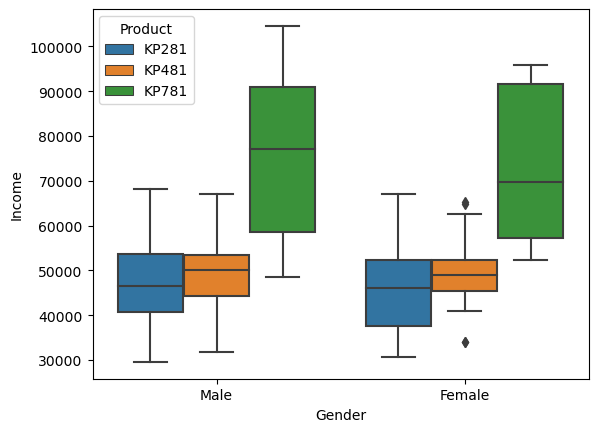

In [11]:
sns.boxplot(data=af,x='Gender',y='Income',hue='Product')

In [25]:
af.groupby(by=["Gender","Product"])["Income"].count().unstack()

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [21]:
pd.crosstab(index=af["Gender"],columns=af["Product"],margins=True,normalize=True)*100

Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.222222,16.111111,3.888889,42.222222
Male,22.222222,17.222222,18.333333,57.777778
All,44.444444,33.333333,22.222222,100.000000


In [3]:
af.shape

(180, 9)

In [4]:
af.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
af.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [55]:
af["Age"]=af.Age.astype('object')

In [57]:
af["Fitness"]=af.Fitness.astype('object')

In [56]:
af.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    object
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 12.8+ KB


In [8]:
af.duplicated().sum()# duplicate rows check


0

In [11]:
af.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

2)  Non-Graphical Analysis: Value counts and unique attributes

In [13]:
af["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [15]:
af["Age"].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42],
      dtype=int64)

In [16]:
af["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [17]:
af["Education"].unique()

array([14, 15, 12, 13, 16, 18, 20, 21], dtype=int64)

In [23]:
af.Usage.unique()

array([3, 2, 4, 5, 6, 7], dtype=int64)

In [25]:
af.MaritalStatus.unique()

array(['Single', 'Partnered'], dtype=object)

In [24]:
af.Fitness.unique()

array([4, 3, 2, 1, 5], dtype=int64)

In [22]:
af.Miles.value_counts()

85     27
95     12
66     10
75     10
47      9
106     9
94      8
113     8
53      7
100     7
180     6
200     6
56      6
64      6
127     5
160     5
42      4
150     4
38      3
74      3
170     3
120     3
103     3
132     2
141     2
280     1
260     1
300     1
240     1
112     1
212     1
80      1
140     1
21      1
169     1
188     1
360     1
Name: Miles, dtype: int64

In [27]:
af.Income.value_counts()

45480    14
52302     9
46617     8
54576     8
53439     8
         ..
65220     1
55713     1
68220     1
30699     1
95508     1
Name: Income, Length: 62, dtype: int64

In [28]:
af.MaritalStatus.value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [18]:
af.Gender.value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [29]:
af.Usage.value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [30]:
af.Fitness.value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [19]:
af.Product.value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [20]:
af.Age.value_counts()

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

Visual Analysis - Univariate & Bivariate 

<Axes: xlabel='Product', ylabel='Age'>

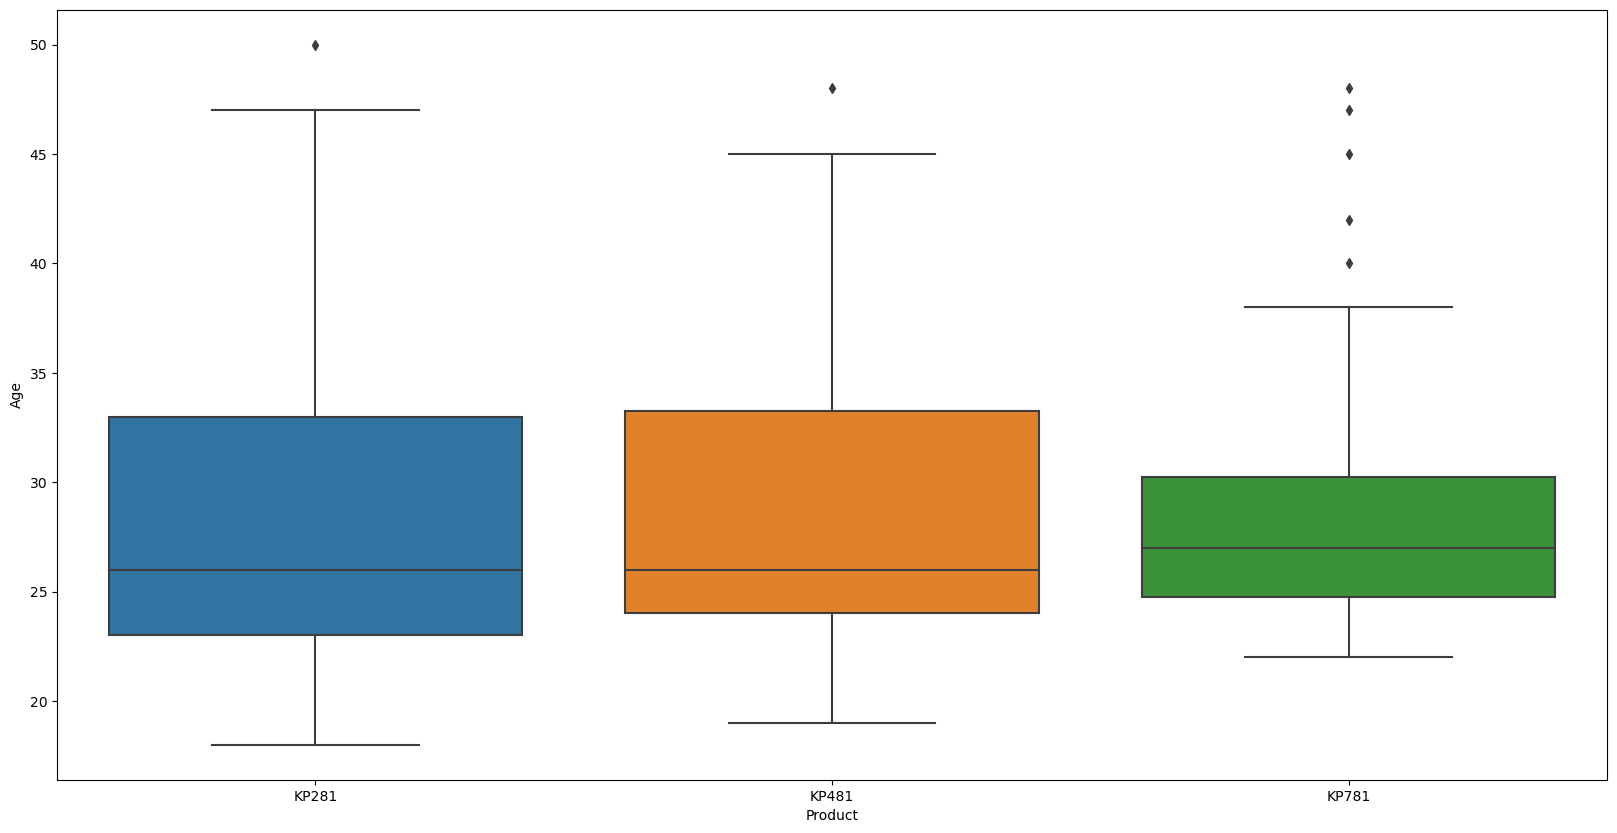

In [58]:
plt.figure(figsize=(20,10))
sns.boxplot(data=af,x='Product',y='Age')

<Axes: xlabel='Gender', ylabel='Miles'>

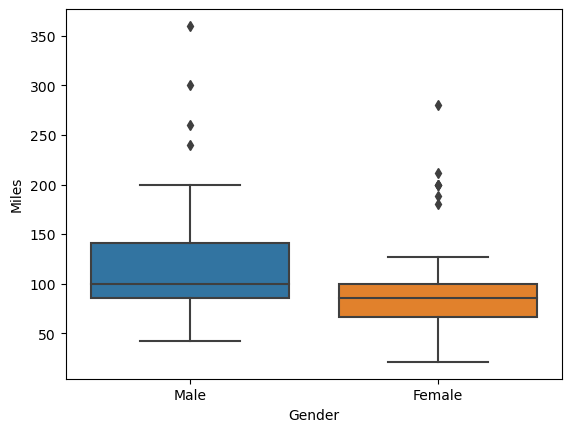

In [33]:
sns.boxplot(data=af,x='Gender',y='Miles')

<Axes: xlabel='MaritalStatus', ylabel='Fitness'>

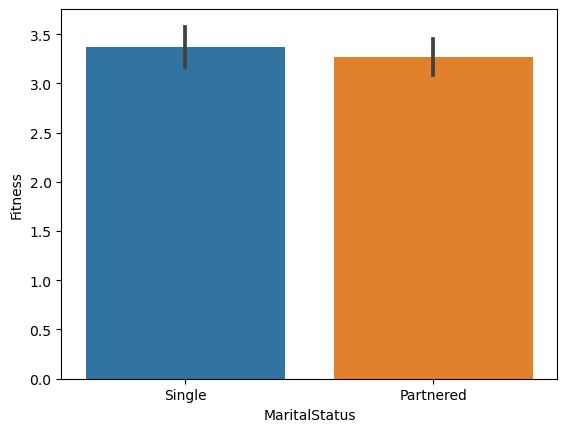

In [63]:
sns.barplot(data=af,x='MaritalStatus',y='Fitness')

   4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis

<function matplotlib.pyplot.show(close=None, block=None)>

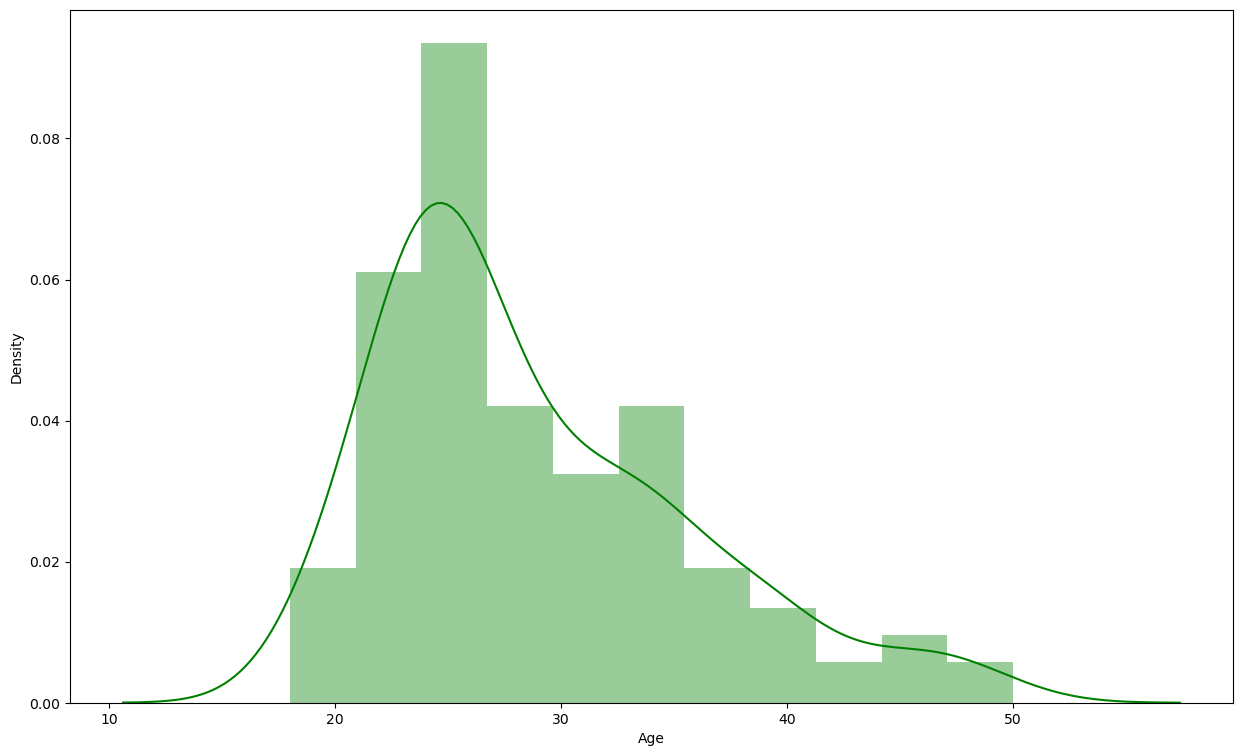

In [2]:
plt.figure(figsize=(15,9))
sns.distplot(af["Age"],color='g')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

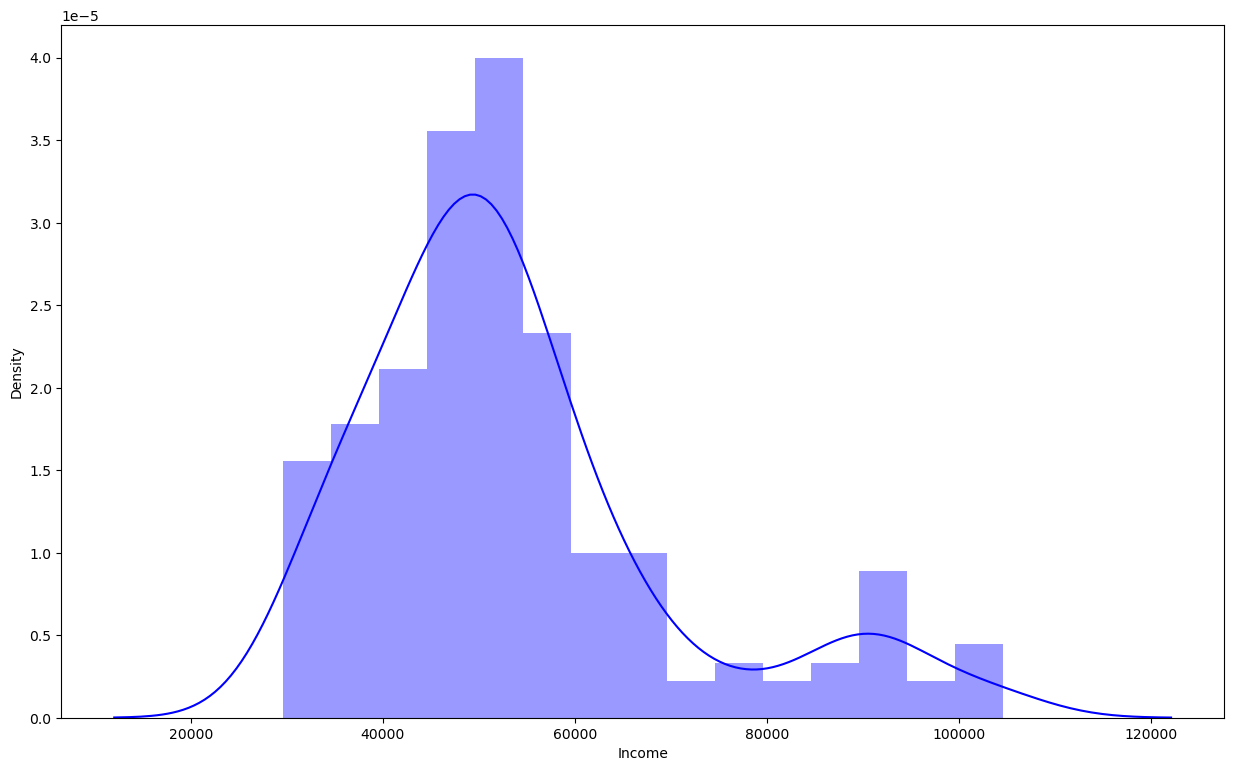

In [4]:
plt.figure(figsize=(15,9))
sns.distplot(af["Income"],color='b')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

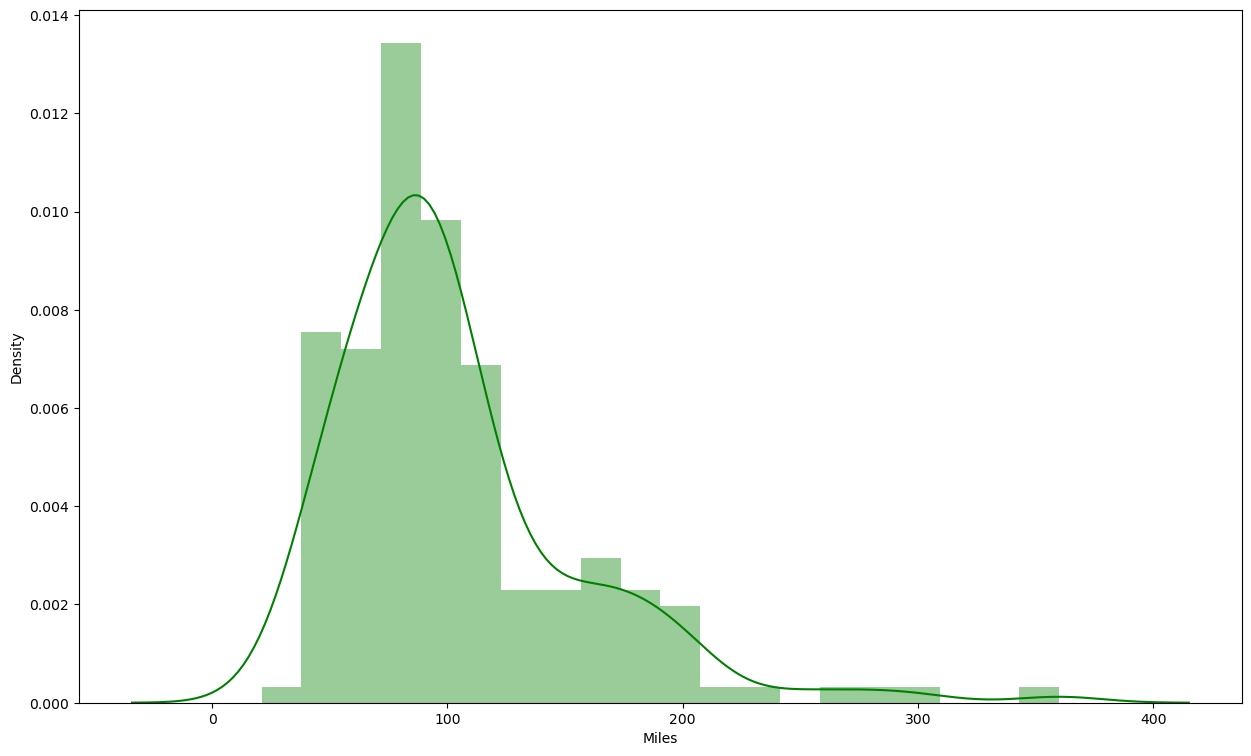

In [7]:
plt.figure(figsize=(15,9))
sns.distplot(af["Miles"],color='g')
plt.show

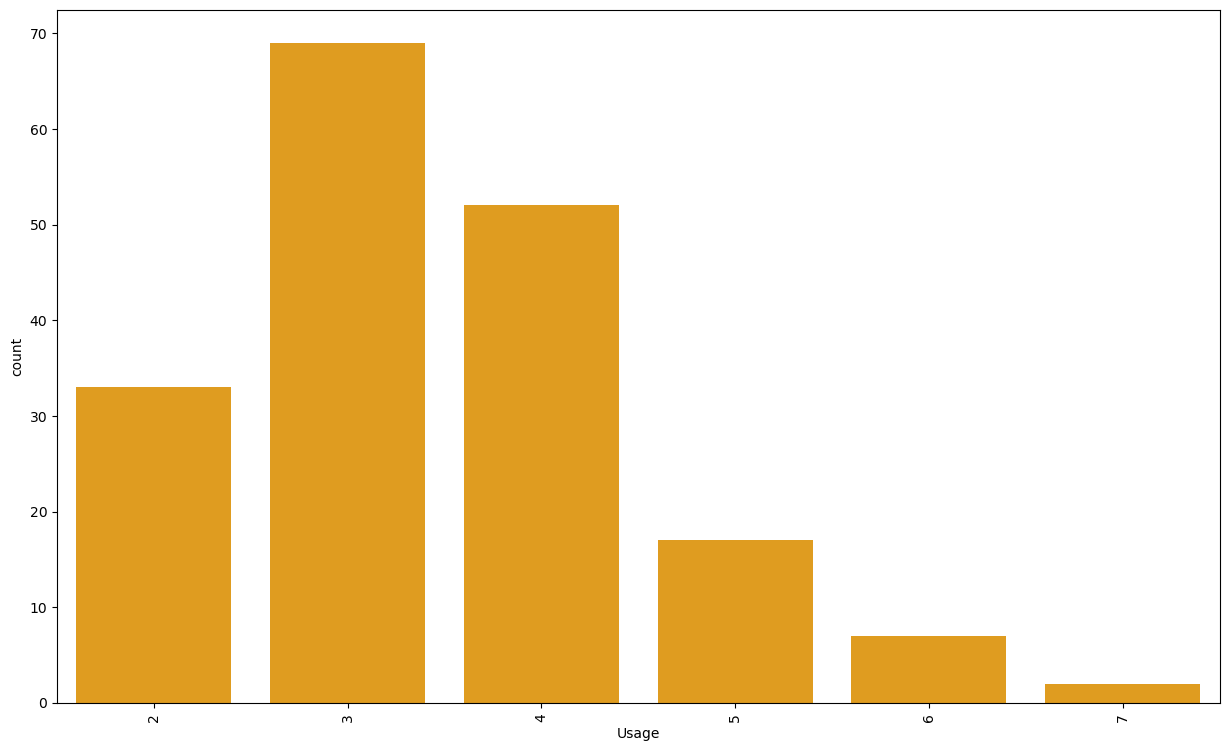

In [67]:
plt.figure(figsize=(15,9))
sns.countplot(data=af,
           x='Usage',          
           color="orange")
plt.xticks(rotation=90)
plt.show()

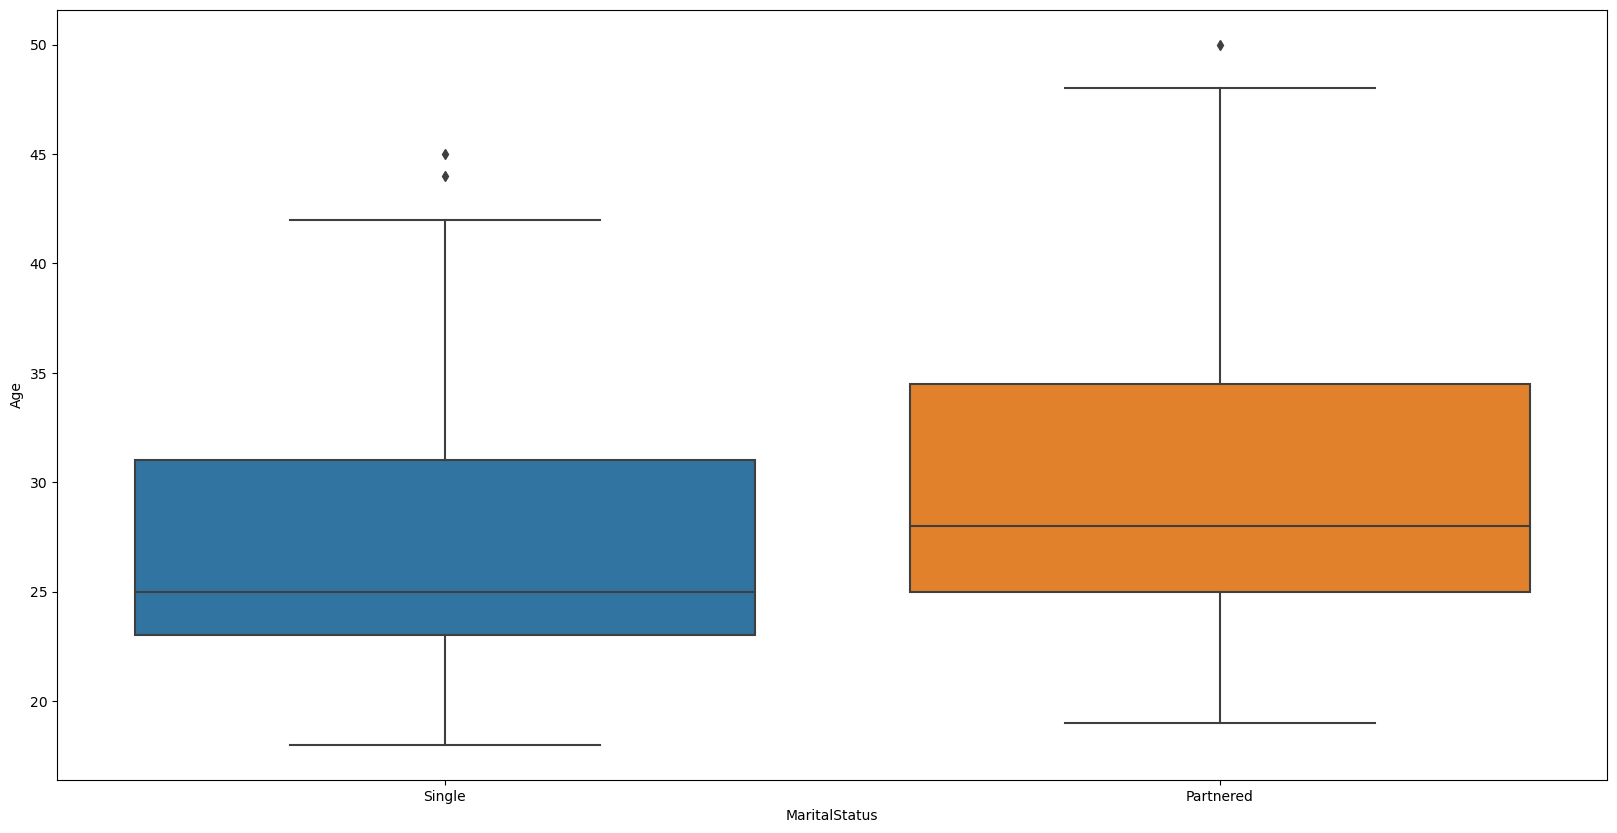

In [13]:
plt.figure(figsize=(20,10))
sns.boxplot(data=af,x="MaritalStatus",y="Age")
plt.show()

<Axes: xlabel='MaritalStatus', ylabel='Count'>

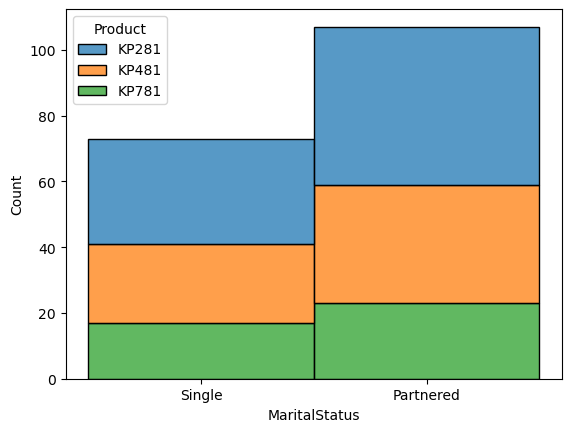

In [18]:
sns.histplot(x="MaritalStatus", hue="Product", data=af, stat="count", multiple="stack")

<Axes: xlabel='Age', ylabel='Count'>

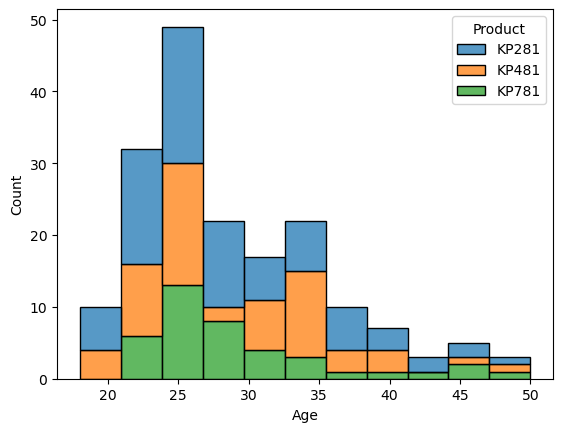

In [20]:
sns.histplot(x="Age", hue="Product", data=af, stat="count", multiple="stack")

In [71]:
pd.crosstab(af.Product,af.Gender,normalize='index')

Gender,Female,Male
Product,,
KP281,0.500000,0.500000
KP481,0.483333,0.516667
KP781,0.175000,0.825000


For correlation: Heatmaps, Pairplots

In [ ]:
#miles vs age
#income vs product
#usage vs age

<Axes: xlabel='Usage', ylabel='Age'>

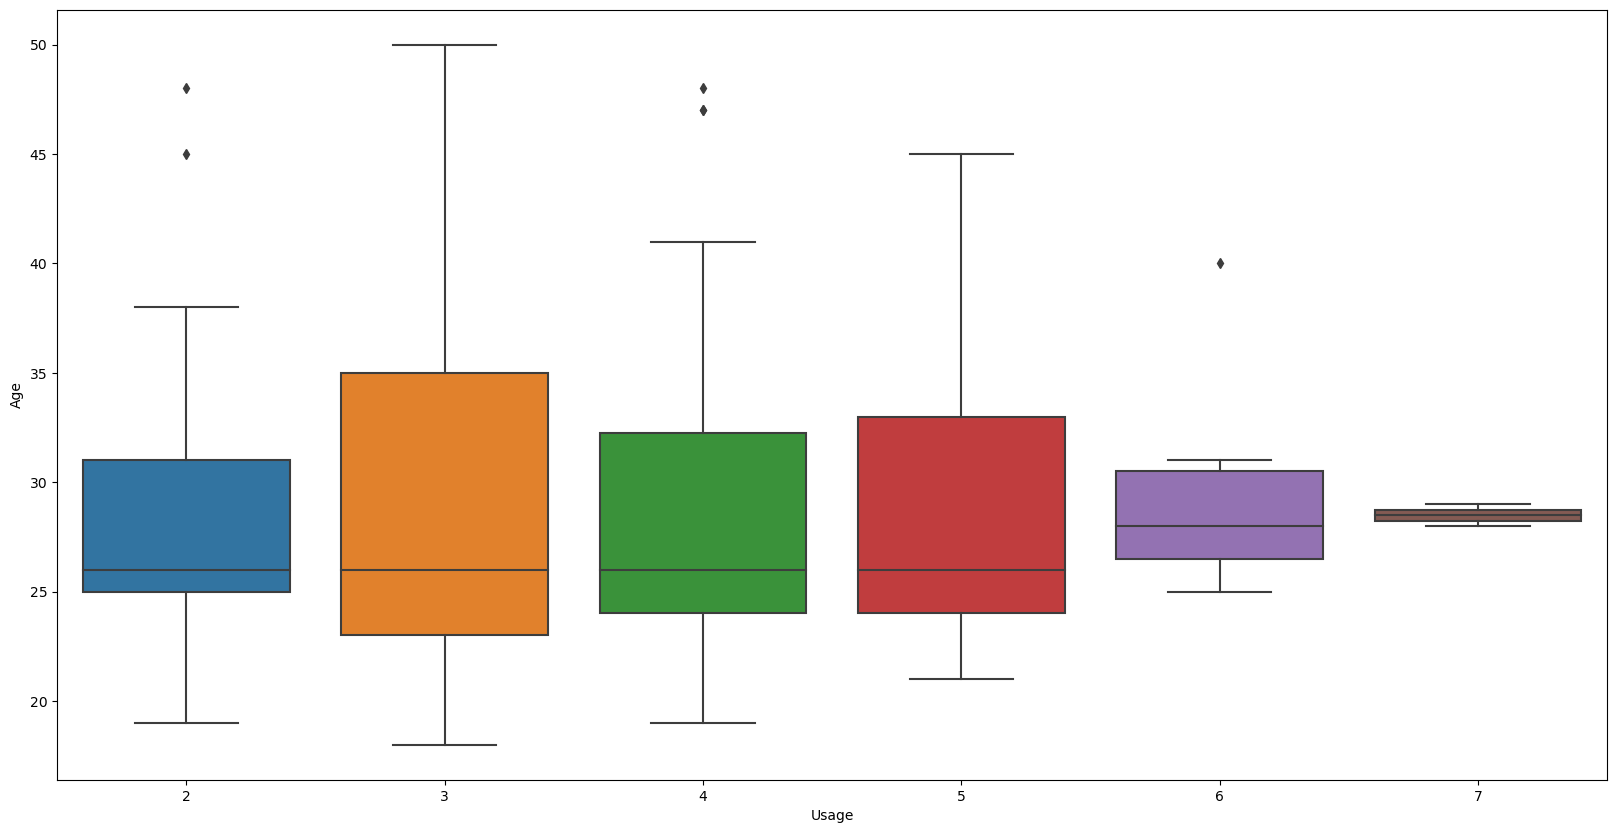

In [62]:
plt.figure(figsize=(20,10))
sns.boxplot(data=af,x='Usage',y='Age')

<Axes: xlabel='Product', ylabel='Income'>

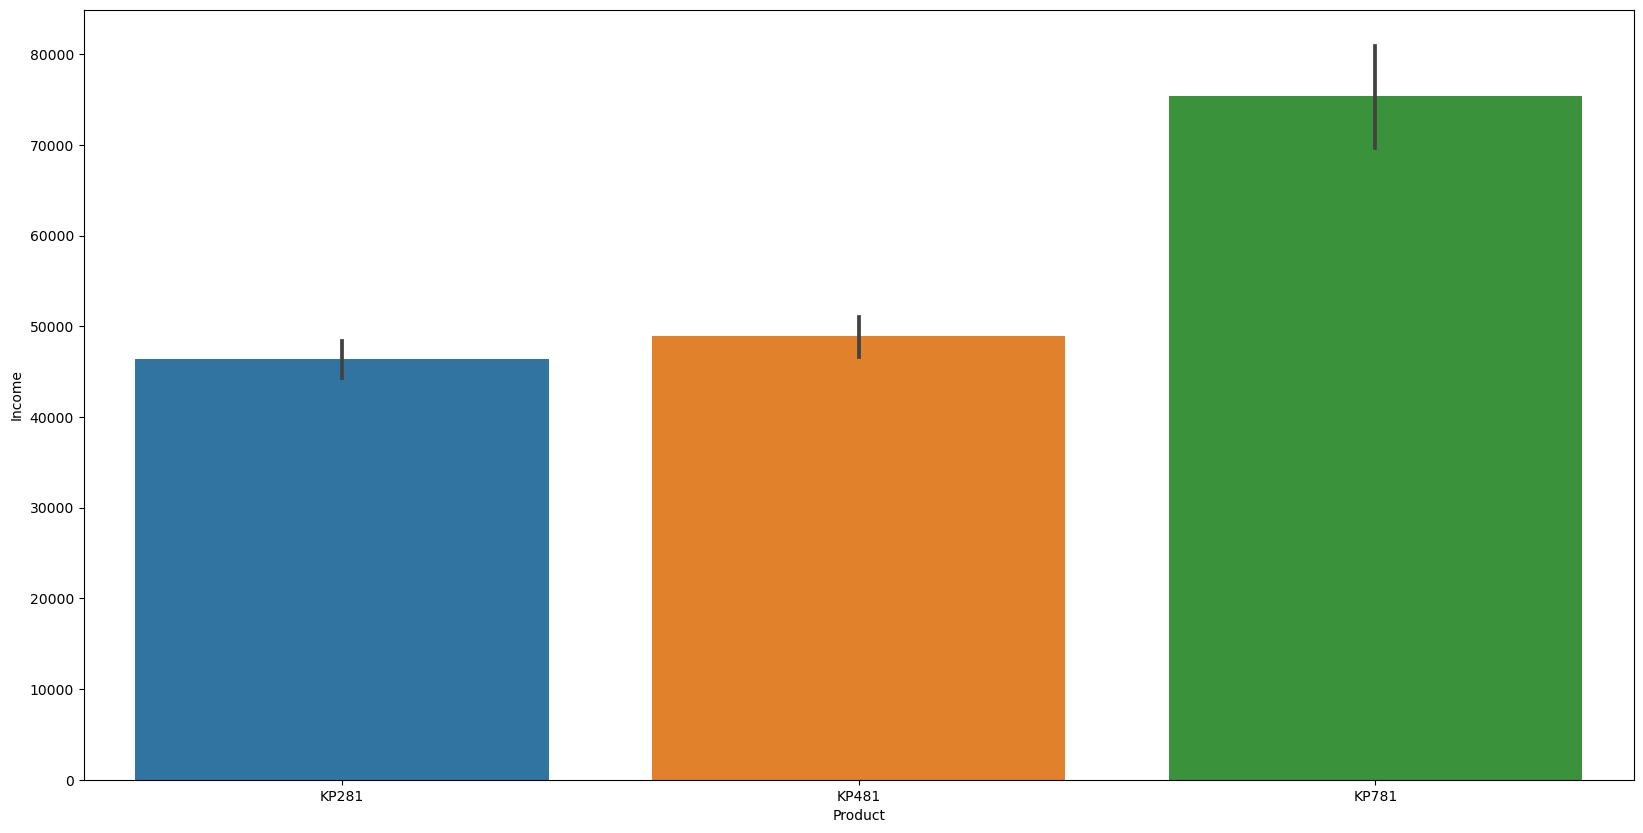

In [43]:
plt.figure(figsize=(20,10))
sns.barplot(data=af,x='Product',y='Income')

<Axes: xlabel='Age', ylabel='Miles'>

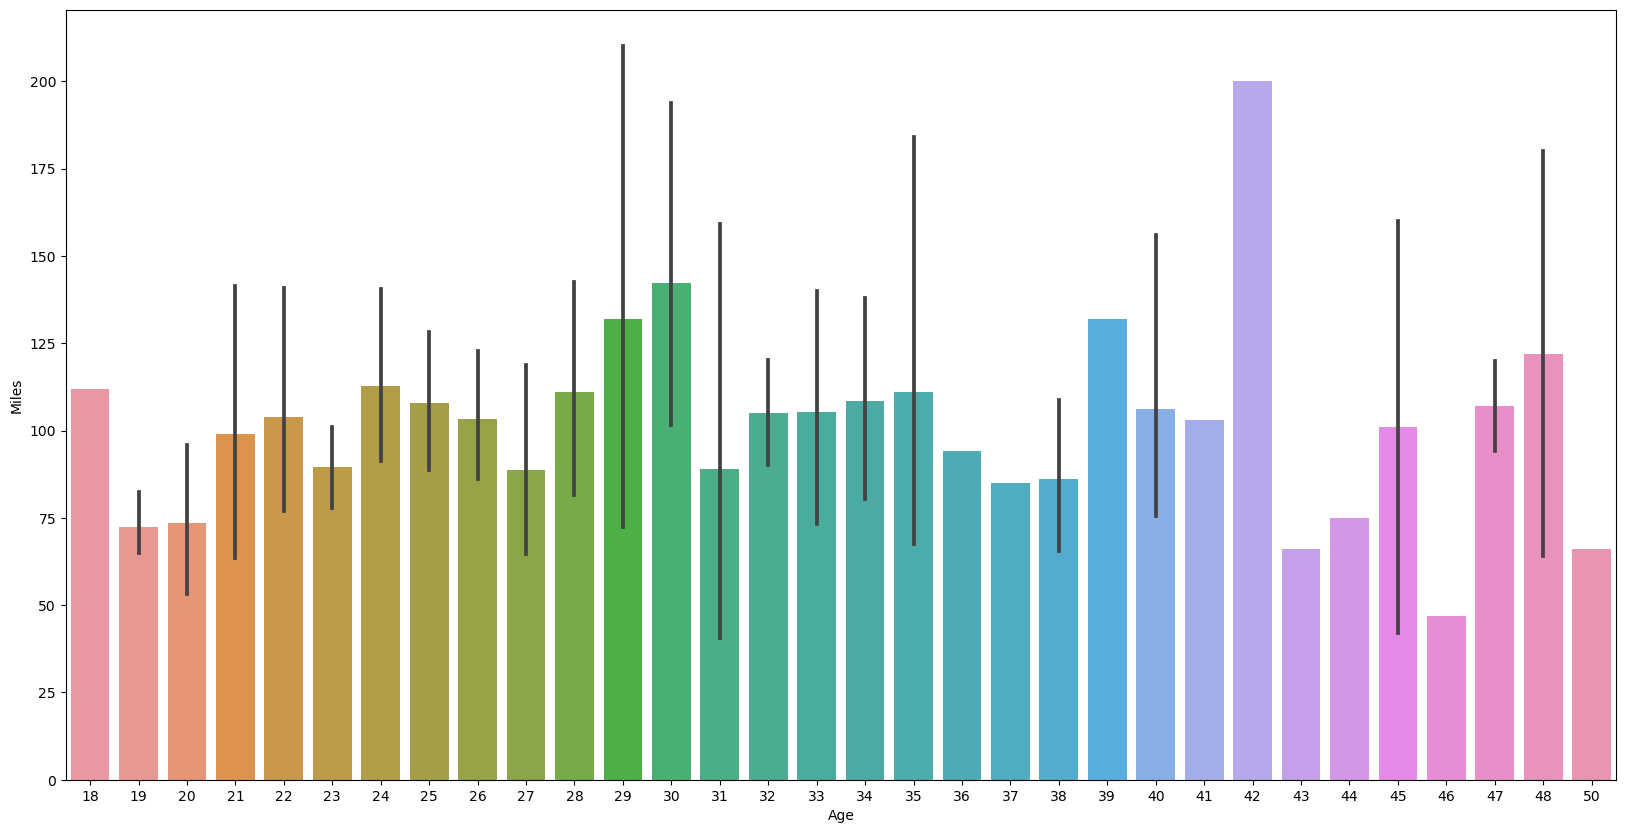

In [78]:
plt.figure(figsize=(20,10))
sns.barplot(data=af,x='Age',y='Miles')

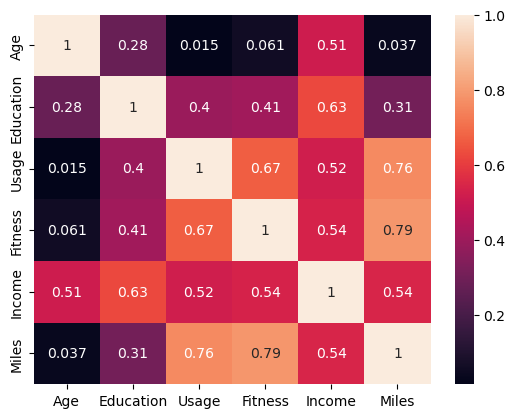

In [37]:
sns.heatmap(af.corr(), annot=True)
plt.show()

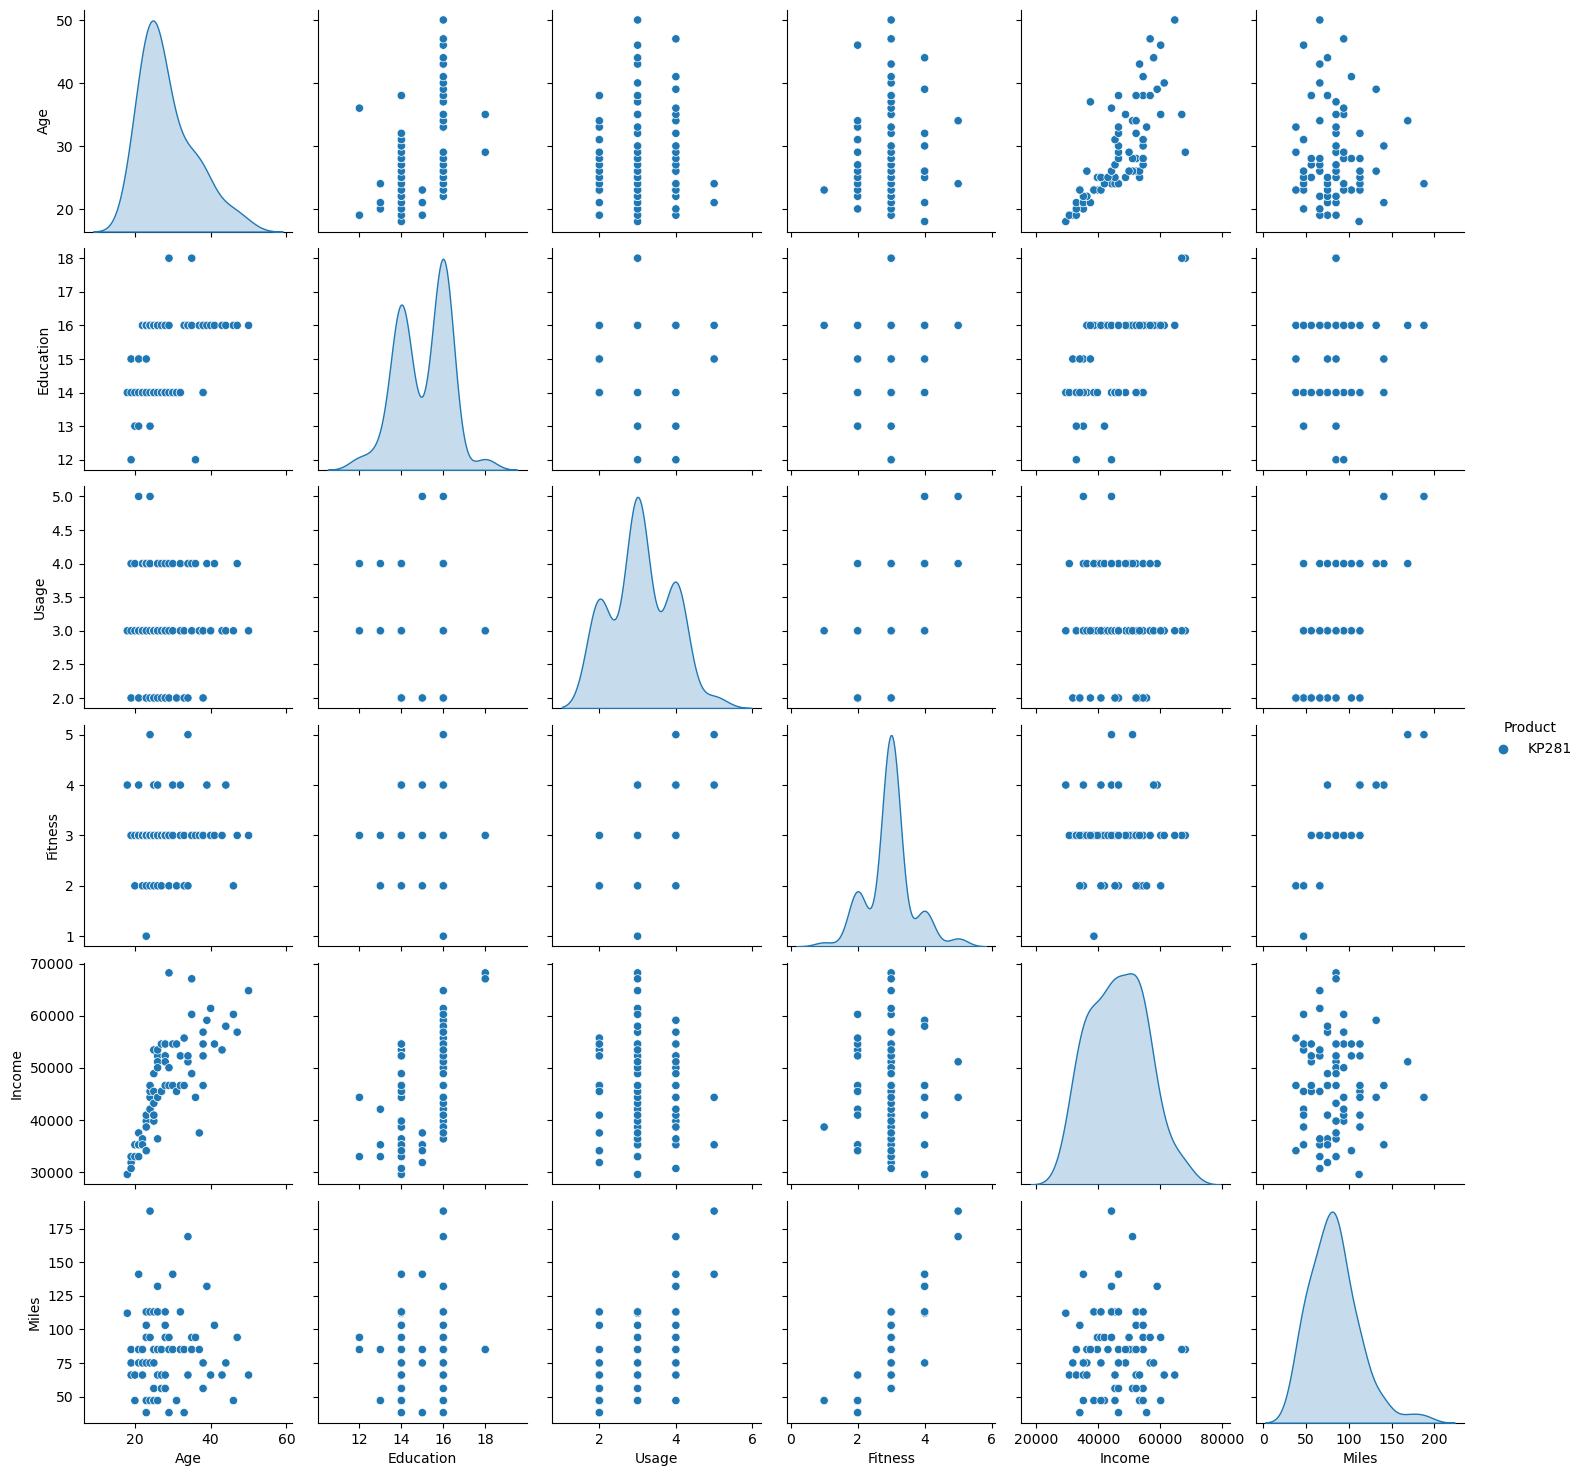

In [73]:
sns.pairplot(af[af["Product"]=='KP281'], hue ='Product')

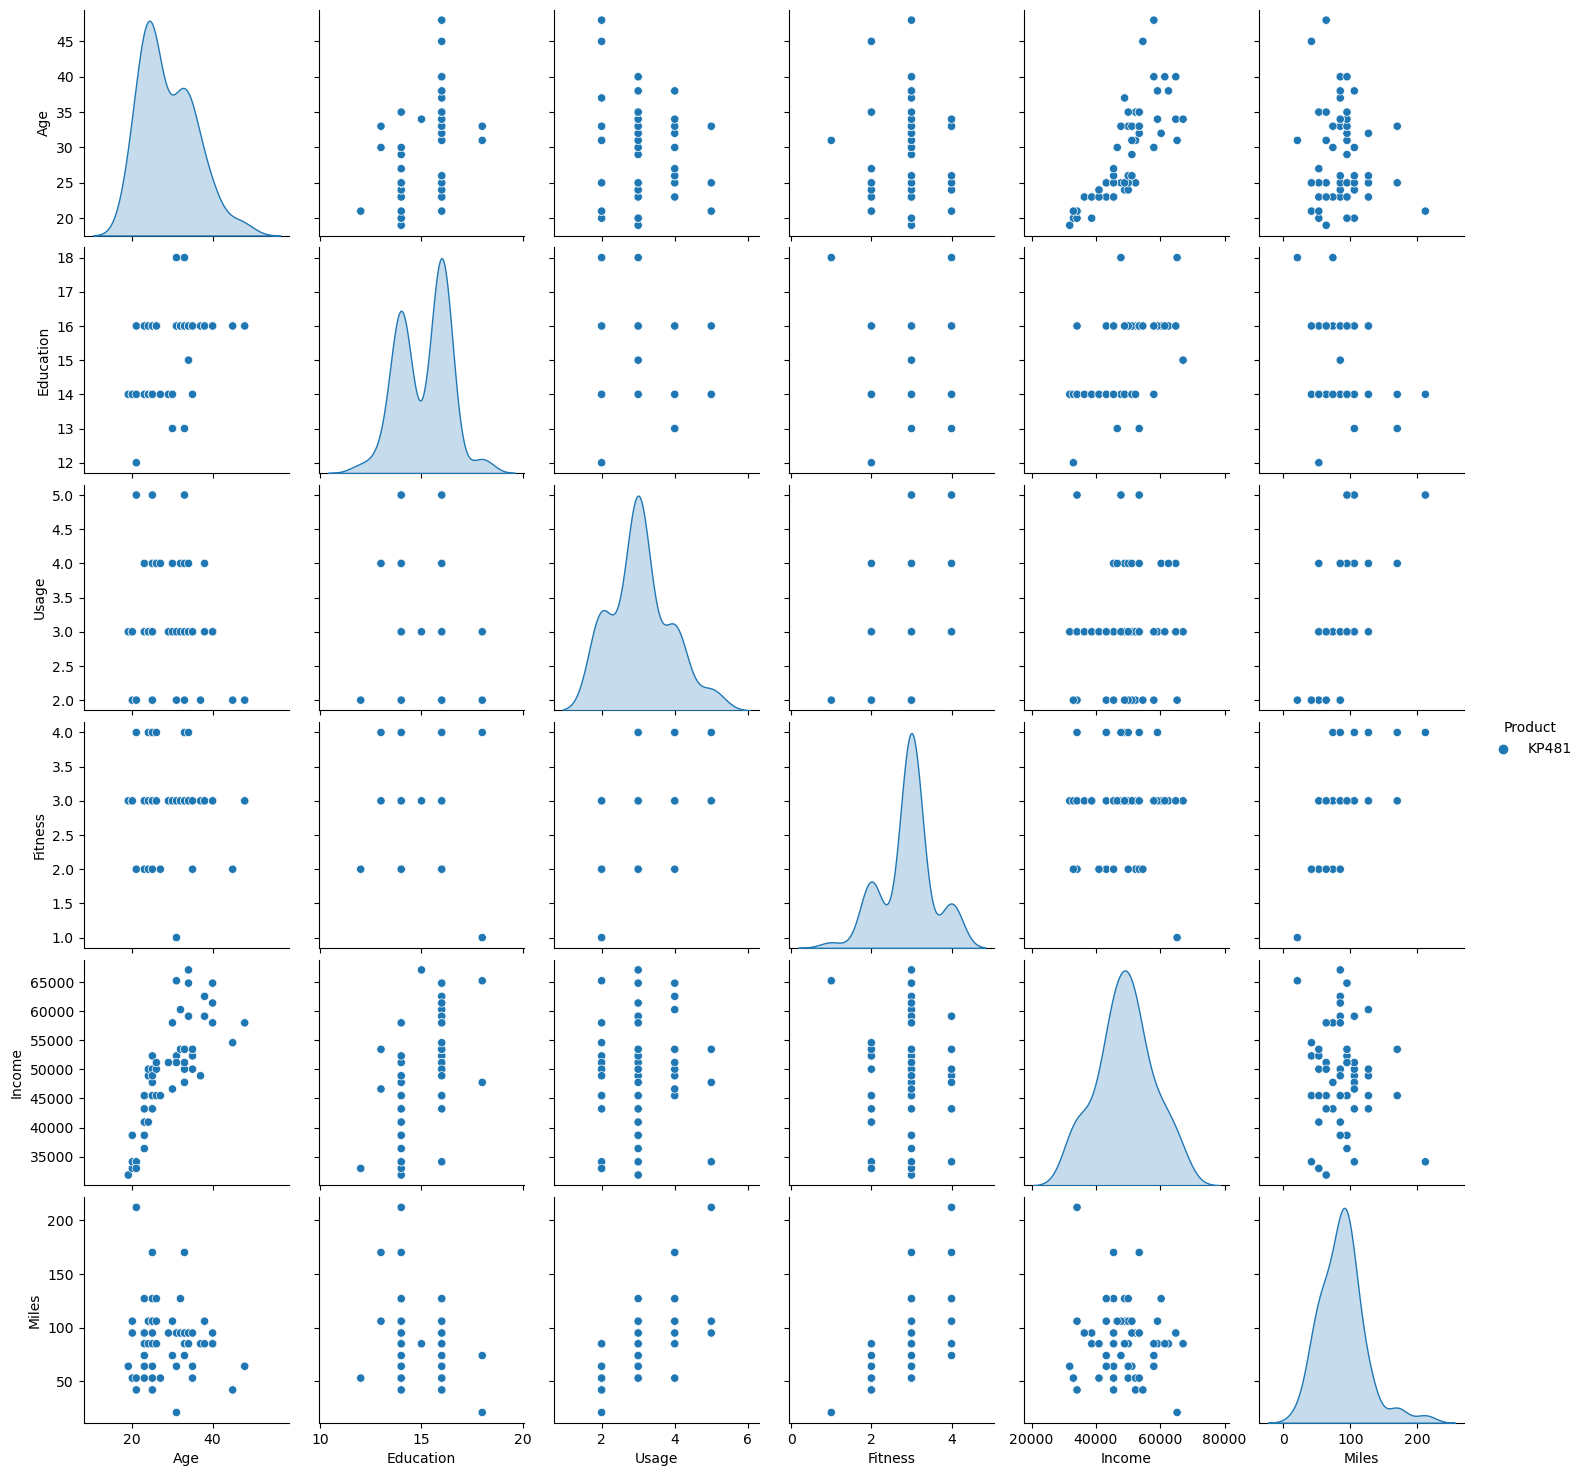

In [75]:
sns.pairplot(af[af["Product"]=='KP481'], hue ='Product')

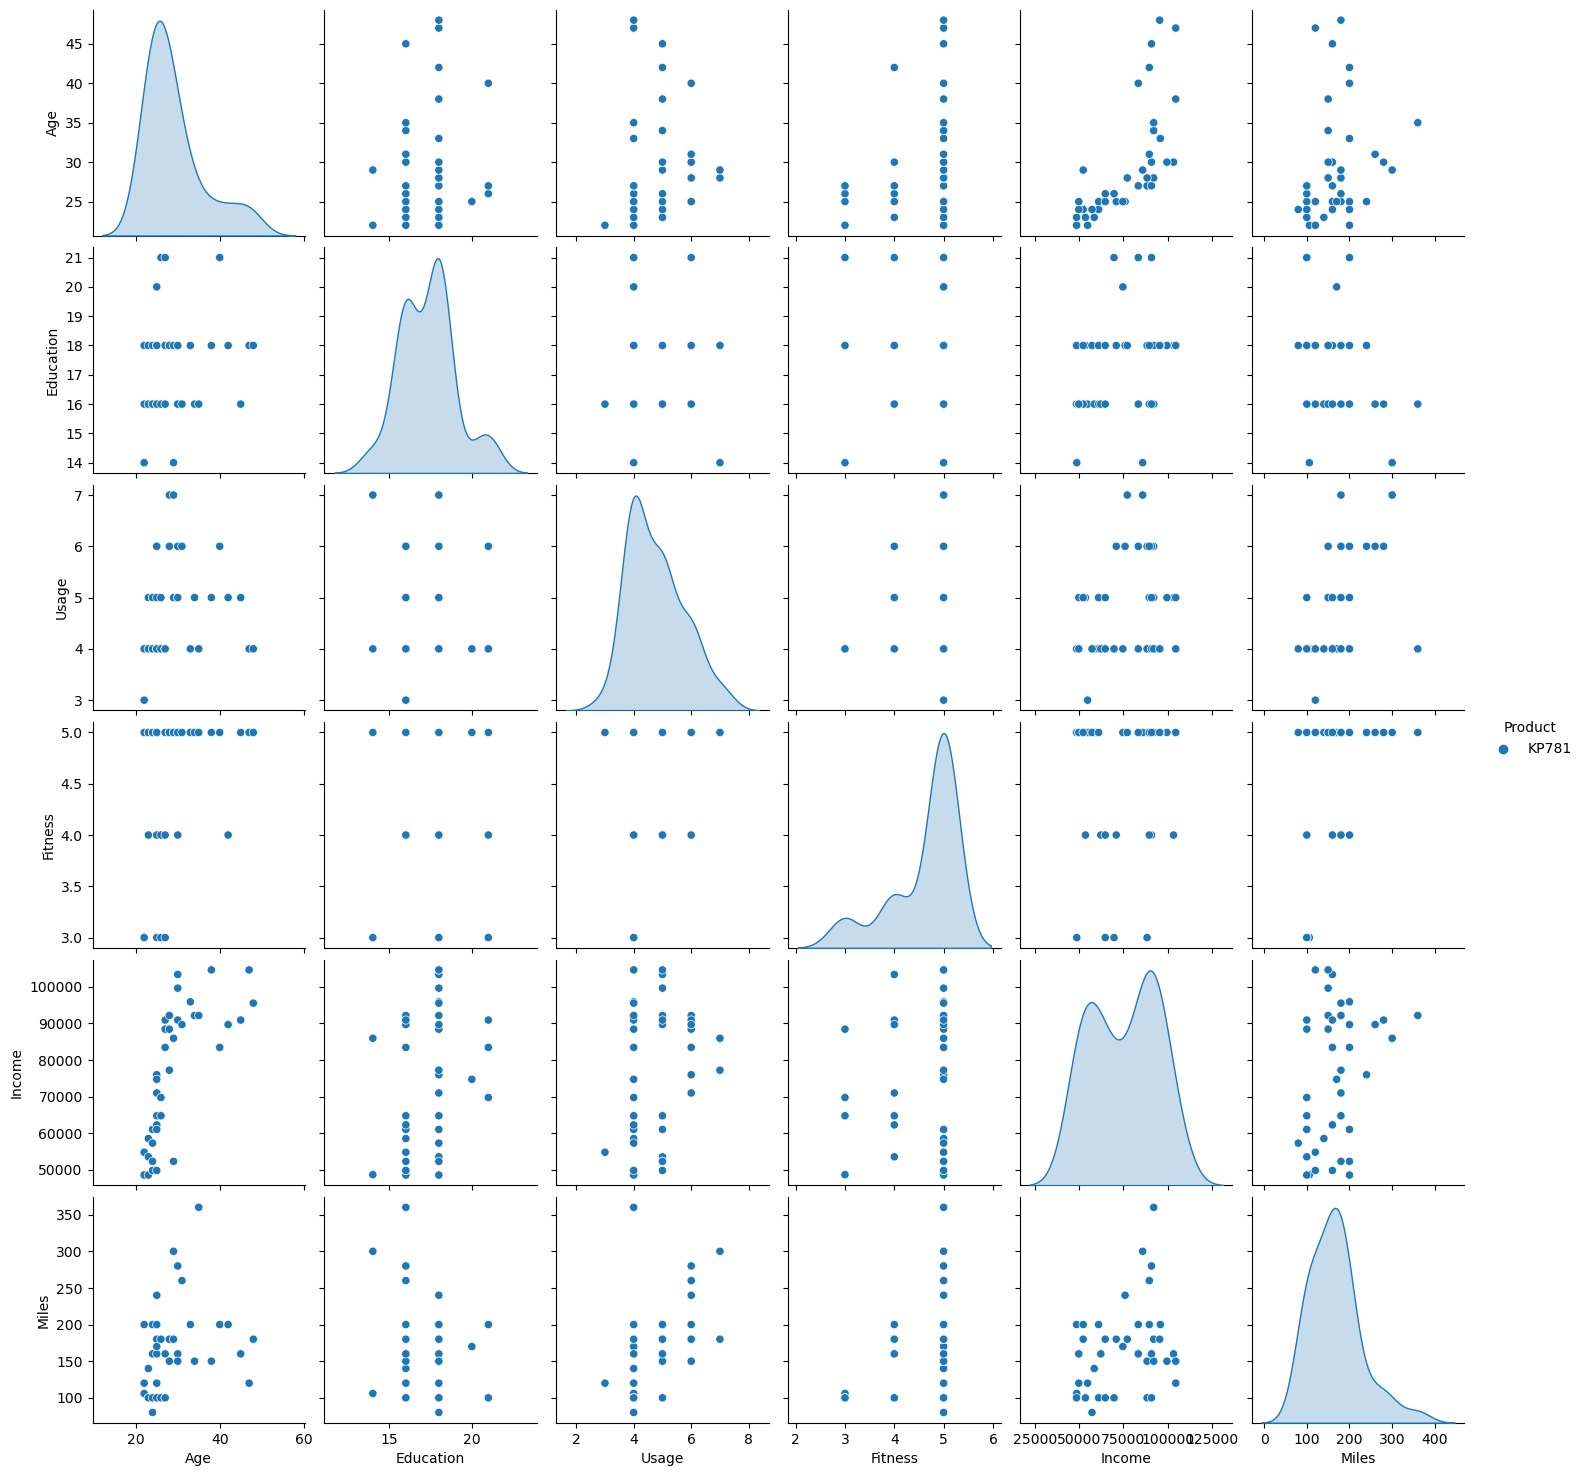

In [76]:
sns.pairplot(af[af["Product"]=='KP781'], hue ='Product')

6.1 Comments on the range of attributes

In [25]:
af.Age.min()

18

In [26]:
af.Age.max()

50

In [27]:
af.Miles.min()

21

In [28]:
af.Miles.max()

360

In [35]:
af.Income.min()

29562

In [36]:
af.Income.max()

104581

In [47]:
af.Fitness.min()

1

In [48]:
af.Fitness.max()

5

In [49]:
af.Usage.min()

2

In [50]:
af.Usage.max()

7

In [59]:
af.Education.min()

12

In [60]:
af.Education.max()

21